In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [29]:
raw_data = pd.read_csv('data.csv', header=None)

In [30]:
raw_data.head()

,0,1,2,3,4,5
0,8:56 AM,9:00 AM,7:45 AM,7:45 AM,8:05 AM,7:45 AM
1,8:40 AM,8:40 AM,8:30 AM,8:30 AM,8:45 AM,8:20 AM
2,8:45 AM,8:20 AM,8:05 AM,8:00 AM,8:05 AM,8:00 AM
3,8:40 AM,8:40 AM,8:40 AM,8:25 AM,8:40 AM,8:40 AM
4,8:55 AM,8:50 AM,8:55 AM,8:10 AM,8:15 AM,8:05 AM


In [31]:
raw_data.values[:3]  # show the first three rows as an array

array([['8:56 AM', '9:00 AM', '7:45 AM', '7:45 AM', '8:05 AM', '7:45 AM'],
       ['8:40 AM', '8:40 AM', '8:30 AM', '8:30 AM', '8:45 AM', '8:20 AM'],
       ['8:45 AM', '8:20 AM', '8:05 AM', '8:00 AM', '8:05 AM', '8:00 AM']],
      dtype=object)

### Put the data in a single array

In [32]:
data = raw_data.values.reshape(-1)
data.shape

(138,)

In [33]:
data[:10], data[-10:]  # show the beginning and the end of data

(array(['8:56 AM', '9:00 AM', '7:45 AM', '7:45 AM', '8:05 AM', '7:45 AM',
        '8:40 AM', '8:40 AM', '8:30 AM', '8:30 AM'], dtype=object),
 array(['9:00 AM', '8:57 AM', '8:57 AM', '8:50 AM', '8:45 AM', '8:50 AM',
        '8:30 AM', '8:45 AM', '8:50 AM', '8:10 AM'], dtype=object))

In [34]:
def convert_time_to_minutes(time_text: str) -> int:
    """Converts time formatted as 'H:MM AM' to minutes before/after 9:00 AM"""
    try:
        time_text = time_text.strip()  # remove any unexpected spaces
        hours_minutes, _, am_pm = time_text.partition(' ')
        hours, _, minutes = hours_minutes.partition(':')
        hours = int(hours)
        hours -= 9  # 9:00 AM is zero
        if am_pm[0].lower() == 'p':
            hours += 12
        minutes = int(minutes)
        return hours*60 + minutes
    except ValueError:
        return None

In [35]:
# should be 0
convert_time_to_minutes("9:00 am")

0

In [36]:
# should be -3
convert_time_to_minutes("8:57 am")

-3

In [37]:
# should be 240
convert_time_to_minutes("1:00 pm")

240

In [38]:
# should be 180
convert_time_to_minutes("12:00 pm")  # why is this an edge case?

900

In [39]:
pd.Timestamp('july 4, 1776')

Timestamp('1776-07-04 00:00:00')

### Oops!
Maybe we shouldn't write our own time logic.

#### Note: there are two things in Python you _never_ want to reinvent from scratch:

1. CSV parsing: use `csv.reader` or `pd.read_csv`
2. Time/date logic: use `pd.Timestamp` or `datetime.datetime`

In [40]:
def convert_time_to_minutes(time_text: str) -> int:
    """Converts time formatted as 'H:MM AM' to minutes before/after 9:00 AM"""
    try:
        time_delta = pd.Timestamp(time_text) - pd.Timestamp("9:00 am")
        return int(time_delta.total_seconds() / 60)
    except ValueError:
        return None
    

In [41]:
minutes_early_or_late = [convert_time_to_minutes(time_text) for time_text in data]

In [42]:
y = [value for value in minutes_early_or_late if value is not None]  # drop missing/None values

In [43]:
x_label = 'Minutes (negative is early, zero is on time, positive is late)'
y_label = 'Count'
hist_title = 'Student On-Time Performance'

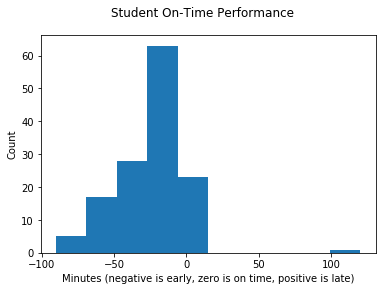

In [44]:
fig, ax = plt.subplots()
ax.hist(y)  # Use the default number of bins
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
fig.suptitle(hist_title)
plt.show()

That's not bad, but maybe more detail would be interesting!

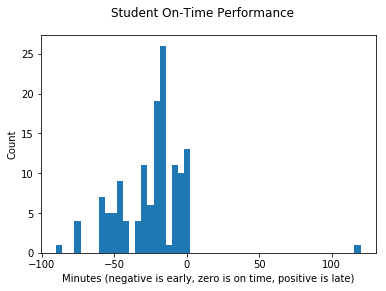

In [45]:
fig, ax = plt.subplots()
ax.hist(y, bins=50)  # More bins is better, right?
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
fig.suptitle(hist_title)
plt.show()

That seems a bit too sparse.

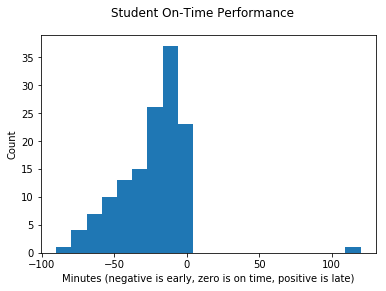

In [46]:
fig, ax = plt.subplots()
ax.hist(y, bins=20)  # Let's try something in between
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
fig.suptitle(hist_title)
plt.show()

# Morning Challenge

# Step 1: Think about distributions

**Look at the histogram of your arrival time data.
Think about some commonly used statistical distributions and look at their probability mass functions and/or probability density functions:
For example: Normal/Gaussian Distribution(https://en.wikipedia.org/wiki/Normal_distribution)
             Exponential Distribution(https://en.wikipedia.org/wiki/Exponential_distribution)**


# Step 2 : Fit a distribution

**Which of these distributions would be _most likely_ to have generated the data?**

In [47]:
from scipy import stats 

**Normal distribution and Exponential distribution**

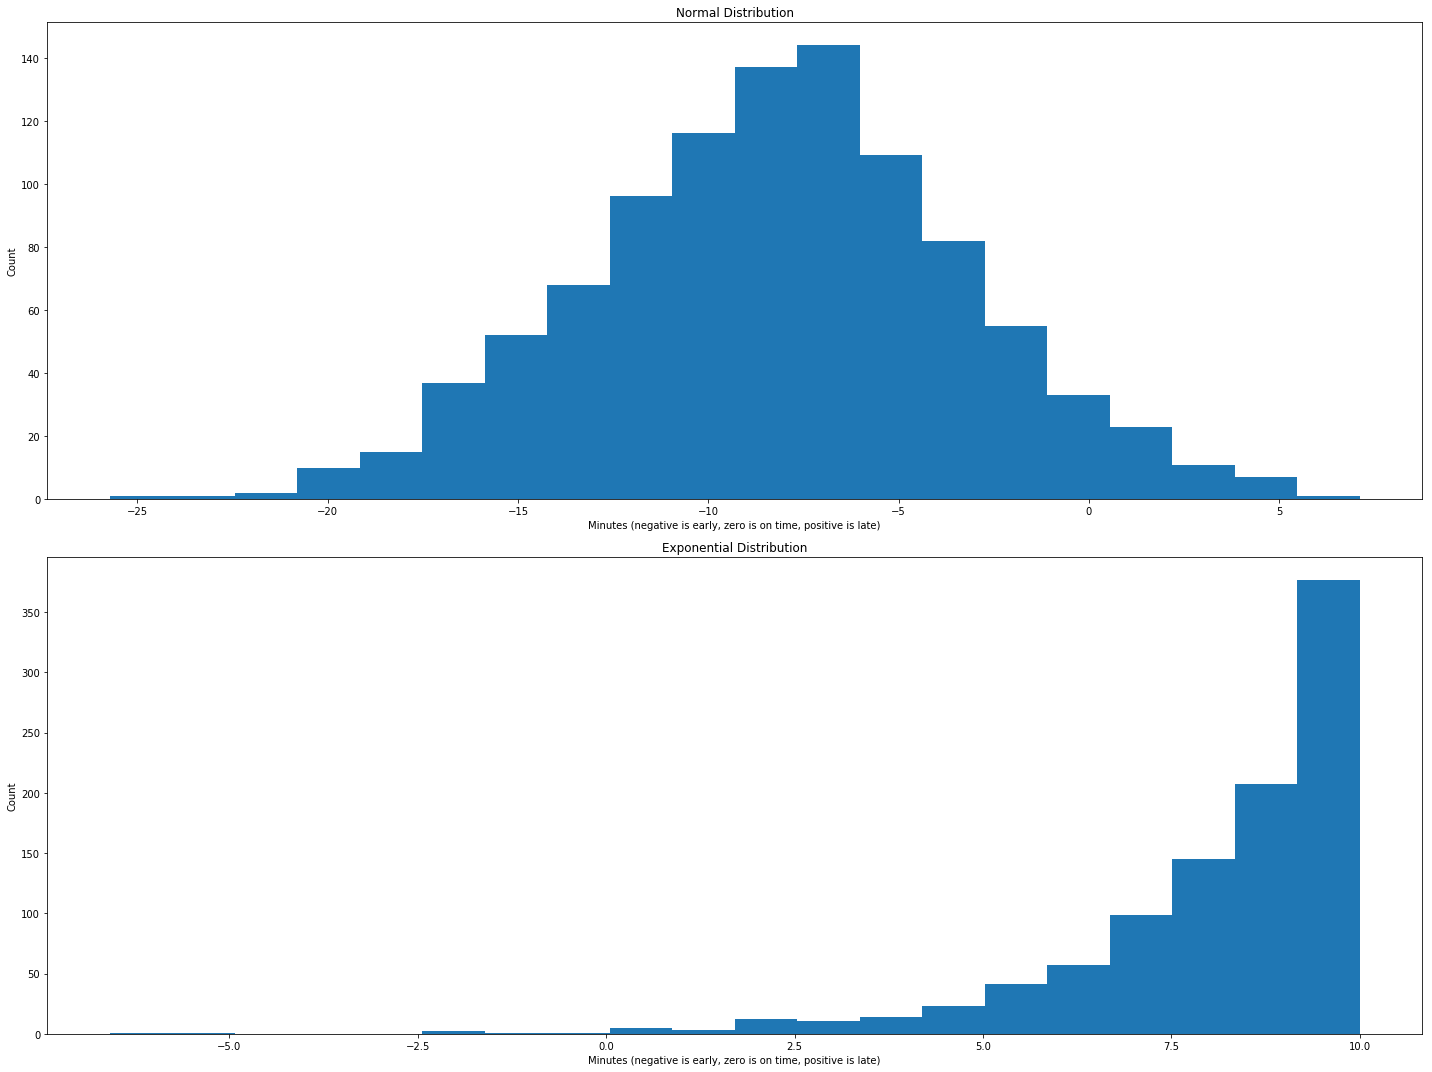

In [59]:

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(20, 15))

# Create some fake data with a normal distribution
normal_dist = stats.norm(loc=-8, scale=5)
fake_y = normal_dist.rvs(1000)  

# Plot the data from the normal distribution
ax = axs[0]
ax.hist(fake_y, bins=20)  # Let's try something in between
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title("Normal Distribution")

# Create some fake data with an exponential distribution
exponential_dist = stats.expon(loc=-10, scale=2)
fake_y = exponential_dist.rvs(1000)  

# Plot the data from the exponential distribution
ax = axs[1]
ax.hist(-fake_y, bins=20)  # -fake bins to flip around
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title("Exponential Distribution")

# Show the plots
plt.tight_layout()
plt.show()

**Exponential distribution most likely generated the data**